In [4]:
# fast f1 only usable in python 3.8 and 3.9
!python --version

Python 3.9.13


In [5]:
%pip install -r requirements.txt

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'
You should consider upgrading via the '/home/dhupee/Projects/Fastf1-head2head/venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [13]:
import fastf1
from fastf1 import plotting
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.collections import LineCollection
from matplotlib import cm
import numpy as np
import pandas as pd
import os

# make cache directory if doesn't exist
if not os.path.exists('cache'):
    os.makedirs('cache')
else:
    print('cache dir exist')

# Setup plotting
plotting.setup_mpl()

# Enable the cache
fastf1.Cache.enable_cache('cache') 

# Get rid of some pandas warnings that are not relevant for us at the moment
pd.options.mode.chained_assignment = None

cache dir exist


In [7]:
# add session
sessions = fastf1.get_session(2022, 'Spa', 'FP2')
sessions.load(laps=True, telemetry=True, weather=True)

# load fastest drivers
VER = sessions.laps.pick_driver('VER').pick_fastest()
LEC = sessions.laps.pick_driver('LEC').pick_fastest()

core           INFO 	Loading data for Spanish Grand Prix - Practice 2 [v2.3.0]
api            INFO 	No cached data found for driver_info. Loading data...
api            INFO 	Fetching driver list...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for timing_data. Loading data...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for timing_app_data. Loading data...
api            INFO 	Fetching timing app data...
api            INFO 	Data has been written to cache!
core           INFO 	Processing timing data...
api            INFO 	No cached data found for session_status_data. Loading data...
api            INFO 	Fetching session status data...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for track_status_data. Loading data...
api            INFO 	Fetching tra

In [8]:
VER_car_data = VER.get_car_data().add_distance()
VER_car_data

,Date,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Time,SessionTime,Distance
0,2022-05-20 15:21:34.980,11199,285,7,100,False,12,car,0 days 00:00:00.082000,0 days 00:36:34.050000,6.491667
1,2022-05-20 15:21:35.220,11408,285,7,100,False,12,car,0 days 00:00:00.322000,0 days 00:36:34.290000,25.491667
2,2022-05-20 15:21:35.660,11498,291,7,100,False,12,car,0 days 00:00:00.762000,0 days 00:36:34.730000,61.058333
3,2022-05-20 15:21:35.980,10688,293,7,100,False,12,car,0 days 00:00:01.082000,0 days 00:36:35.050000,87.102778
4,2022-05-20 15:21:36.220,10448,295,8,100,False,12,car,0 days 00:00:01.322000,0 days 00:36:35.290000,106.769444
...,...,...,...,...,...,...,...,...,...,...,...
294,2022-05-20 15:22:53.821,10726,270,7,100,False,12,car,0 days 00:01:18.923000,0 days 00:37:52.891000,4547.099167
295,2022-05-20 15:22:54.140,10798,273,7,100,False,12,car,0 days 00:01:19.242000,0 days 00:37:53.210000,4571.290000
296,2022-05-20 15:22:54.340,10855,275,7,100,False,12,car,0 days 00:01:19.442000,0 days 00:37:53.410000,4586.567778
297,2022-05-20 15:22:54.620,11036,277,7,100,False,12,car,0 days 00:01:19.722000,0 days 00:37:53.690000,4608.112222


In [9]:
LEC_car_data = LEC.get_car_data().add_distance()
LEC_car_data

,Date,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Time,SessionTime,Distance
0,2022-05-20 15:28:01.861,11328,282,7,100,False,12,car,0 days 00:00:00.082000,0 days 00:43:00.931000,6.423333
1,2022-05-20 15:28:02.181,11407,285,7,99,False,12,car,0 days 00:00:00.402000,0 days 00:43:01.251000,31.756667
2,2022-05-20 15:28:02.541,11536,287,7,100,False,12,car,0 days 00:00:00.762000,0 days 00:43:01.611000,60.456667
3,2022-05-20 15:28:02.901,11620,290,7,100,False,12,car,0 days 00:00:01.122000,0 days 00:43:01.971000,89.456667
4,2022-05-20 15:28:03.101,10701,292,7,99,False,12,car,0 days 00:00:01.322000,0 days 00:43:02.171000,105.678889
...,...,...,...,...,...,...,...,...,...,...,...
299,2022-05-20 15:29:20.422,10817,268,7,100,False,12,car,0 days 00:01:18.643000,0 days 00:44:19.492000,4558.528056
300,2022-05-20 15:29:20.702,10904,271,7,100,False,12,car,0 days 00:01:18.923000,0 days 00:44:19.772000,4579.605833
301,2022-05-20 15:29:20.902,10962,273,7,100,False,12,car,0 days 00:01:19.123000,0 days 00:44:19.972000,4594.772500
302,2022-05-20 15:29:21.102,10987,275,7,100,False,12,car,0 days 00:01:19.323000,0 days 00:44:20.172000,4610.050278


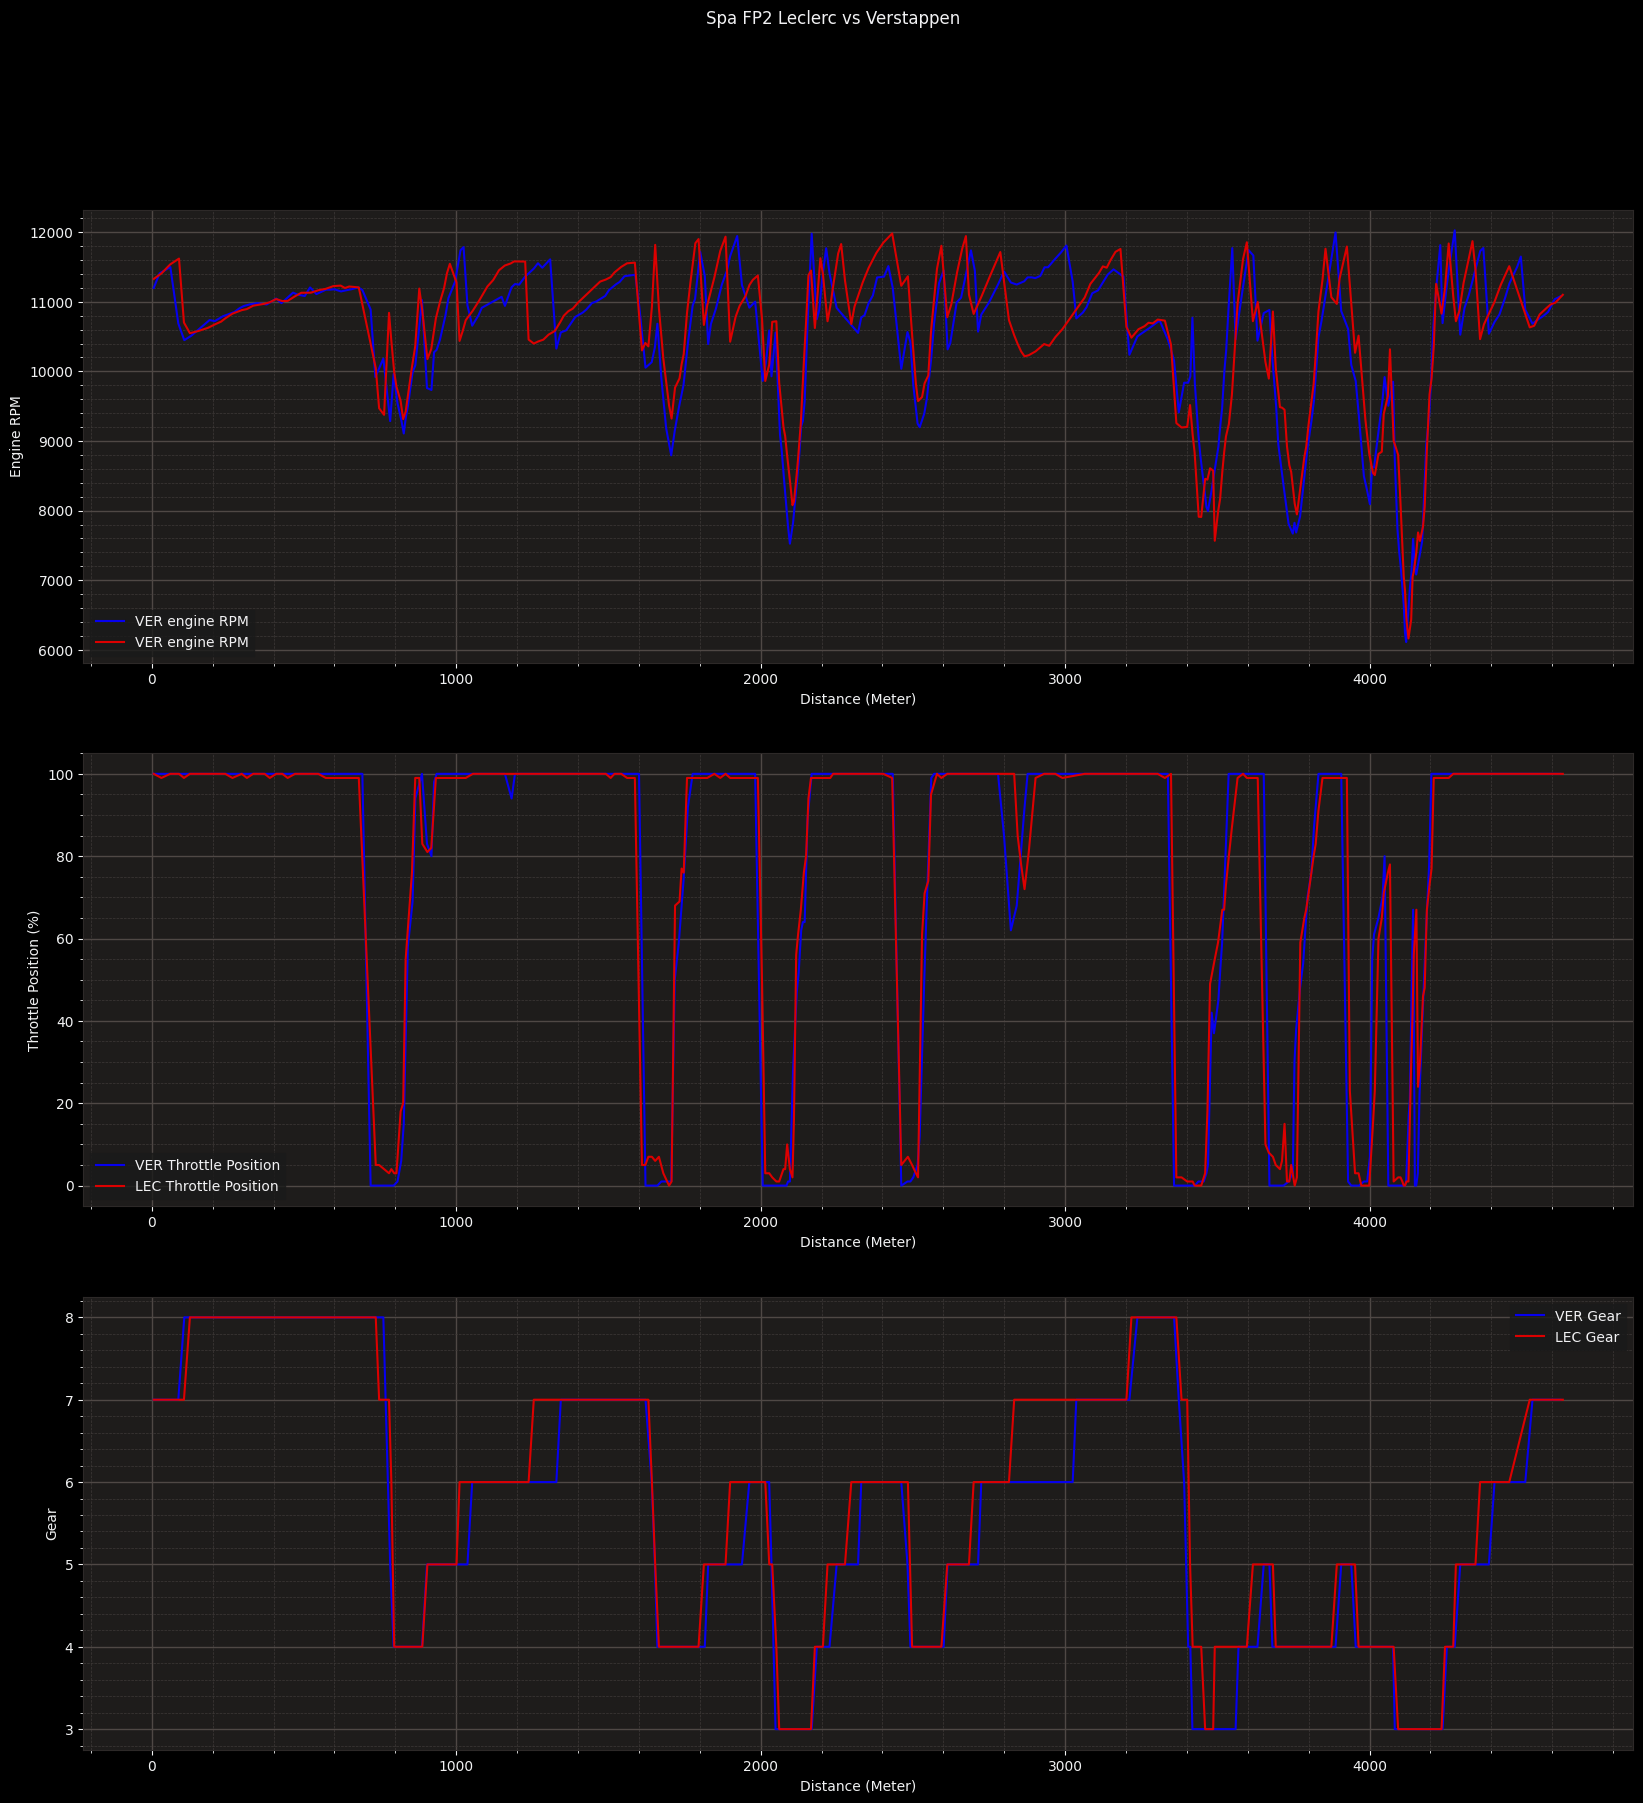

In [12]:
#plot VER quali RPM
VER_rpm = VER_car_data['RPM']
VER_tps = VER_car_data['Throttle']
VER_distance = VER_car_data['Distance']
VER_gear = VER_car_data['nGear']

#plot LEC quali RPM
LEC_rpm = LEC_car_data['RPM']
LEC_tps = LEC_car_data['Throttle']
LEC_distance = LEC_car_data['Distance']
LEC_gear = LEC_car_data['nGear']

#plotting color
RBR_color = fastf1.plotting.team_color('RBR')
FER_color = fastf1.plotting.team_color('FER')

fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(20,20), facecolor='black')
fig.suptitle('Spa FP2 Leclerc vs Verstappen')

ax1.plot(VER_distance, VER_rpm, color=RBR_color , label = 'VER engine RPM')
ax1.plot(LEC_distance, LEC_rpm, color=FER_color , label = 'VER engine RPM')
ax1.set_xlabel('Distance (Meter)')
ax1.set_ylabel('Engine RPM')
ax1.legend()

ax2.plot(VER_distance, VER_tps, color=RBR_color , label = 'VER Throttle Position')
ax2.plot(LEC_distance, LEC_tps, color=FER_color , label = 'LEC Throttle Position')
ax2.set_xlabel('Distance (Meter)')
ax2.set_ylabel('Throttle Position (%)')
ax2.legend()

ax3.plot(VER_distance, VER_gear, color=RBR_color , label = 'VER Gear')
ax3.plot(LEC_distance, LEC_gear, color=FER_color , label = 'LEC Gear')
ax3.set_xlabel('Distance (Meter)')
ax3.set_ylabel('Gear')
ax3.legend()

plt.show()

In [ ]:
# need pole sitter X and Y for circuit plotting

rus_pos_data = rus.get_pos_data()
rus_pos_data

,Date,Status,X,Y,Z,Source,Time,SessionTime
0,2022-07-30 14:59:16.033,OnTrack,-1606,-14,2388,pos,0 days 00:00:00.210000,0 days 01:13:50.293000
1,2022-07-30 14:59:16.113,OnTrack,-1652,23,2388,pos,0 days 00:00:00.290000,0 days 01:13:50.373000
2,2022-07-30 14:59:16.353,OnTrack,-1792,137,2388,pos,0 days 00:00:00.530000,0 days 01:13:50.613000
3,2022-07-30 14:59:16.613,OnTrack,-1945,263,2388,pos,0 days 00:00:00.790000,0 days 01:13:50.873000
4,2022-07-30 14:59:16.853,OnTrack,-2147,429,2388,pos,0 days 00:00:01.030000,0 days 01:13:51.113000
...,...,...,...,...,...,...,...,...
287,2022-07-30 15:00:32.033,OnTrack,-866,-650,2389,pos,0 days 00:01:16.210000,0 days 01:15:06.293000
288,2022-07-30 15:00:32.273,OnTrack,-1059,-476,2388,pos,0 days 00:01:16.450000,0 days 01:15:06.533000
289,2022-07-30 15:00:32.553,OnTrack,-1119,-423,2388,pos,0 days 00:01:16.730000,0 days 01:15:06.813000
290,2022-07-30 15:00:32.893,OnTrack,-1363,-213,2388,pos,0 days 00:01:17.070000,0 days 01:15:07.153000


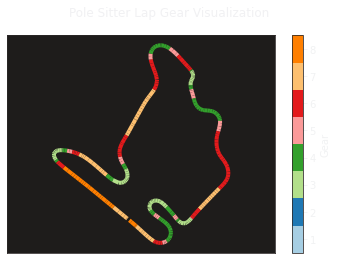

In [ ]:
# need pole sitter gear and position as reference for circuit plotting

# prepare the position
x = np.array(rus_pos_data['X'].values)
y = np.array(rus_pos_data['Y'].values)

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
gear = rus_car_data['nGear'].to_numpy().astype(float)

# create a line collection
cmap = cm.get_cmap('Paired')
lc_comp = LineCollection(segments, norm=plt.Normalize(1, cmap.N+1), cmap=cmap)
lc_comp.set_array(gear)
lc_comp.set_linewidth(4)

# plotting
plt.gca().add_collection(lc_comp)
plt.axis('equal')
plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)

title = plt.suptitle('Pole Sitter Lap Gear Visualization')

cbar = plt.colorbar(mappable=lc_comp, label="Gear", boundaries=np.arange(1, 10))
cbar.set_ticks(np.arange(1.5, 9.5))
cbar.set_ticklabels(np.arange(1, 9))

plt.show()